In [16]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, GlobalMaxPooling2D

## Load and explore dataset

In [3]:
df_train = pd.read_csv('dataset/training.csv')
df_test = pd.read_csv('dataset/test.csv')
lookup_table = pd.read_csv('dataset/IdLookupTable.csv')

In [4]:
print('Training set size {}'.format(len(df_train)))
print('Test set size {}'.format(len(df_test)))

Training set size 7049
Test set size 1783


In [5]:
features = df_train.columns.values[:30]

In [6]:
df_train.head(3).T

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


In [7]:
df_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

### Show examples

In [8]:
def show_face(person, ax=plt):
    image = np.array(person['Image'].split(' '), np.float32)
    image = image.reshape((96, 96))
    
    for i in range(0, len(features), 2):
        feature1 = features[i]
        feature2 = features[i + 1]

        pos_x = np.float32(person[feature1])
        pos_y = np.float32(person[feature2])
        
        if not np.isnan(pos_x) and not np.isnan(pos_y):
            cv2.circle(image, (pos_x, pos_y), 1, 255, -1)

    ax.imshow(image, cmap='gray')

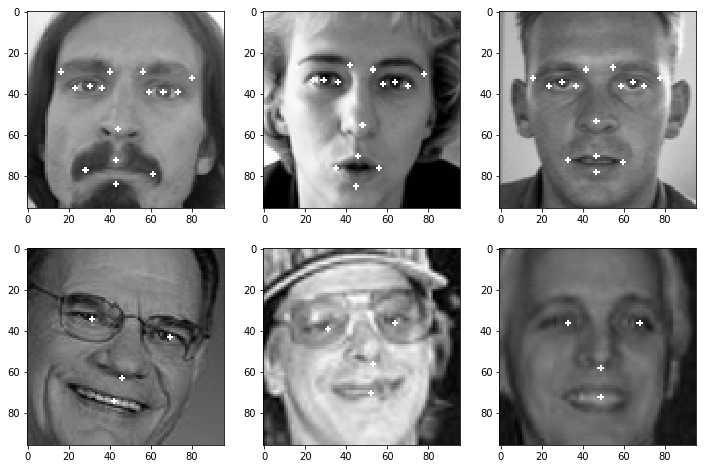

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

show_face(df_train.loc[0], ax[0][0])
show_face(df_train.loc[1], ax[0][1])
show_face(df_train.loc[2], ax[0][2])
show_face(df_train.loc[6000], ax[1][0])
show_face(df_train.loc[6001], ax[1][1])
show_face(df_train.loc[6002], ax[1][2])

### Fill null value

In [10]:
df_train.fillna(method='pad', inplace=True)

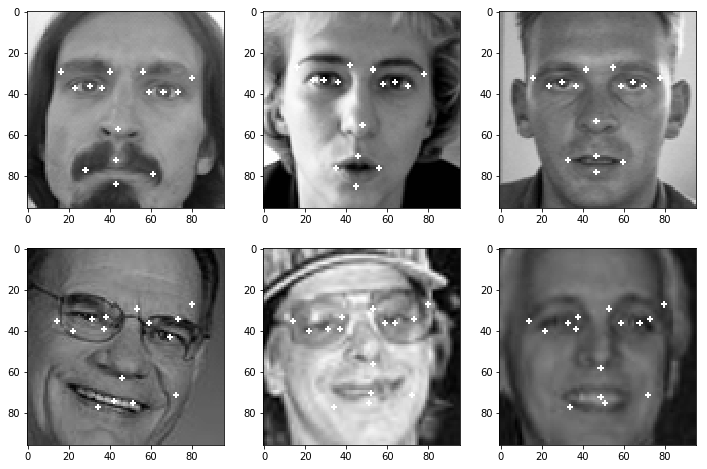

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

show_face(df_train.loc[0], ax[0][0])
show_face(df_train.loc[1], ax[0][1])
show_face(df_train.loc[2], ax[0][2])
show_face(df_train.loc[6000], ax[1][0])
show_face(df_train.loc[6001], ax[1][1])
show_face(df_train.loc[6002], ax[1][2])

## Preprocess data

In [33]:
def convert_image(image_str):
    image = np.array(image_str.split(' '), np.float32)
    image = image.reshape((96, 96, 1))
    image = np.repeat(image, 3, 2)
    return image

In [35]:
images = np.array([convert_image(image) for image in df_train['Image']])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(images, df_train[features], test_size=0.25, random_state=42)

## Build model

In [37]:
base_model = ResNet50(input_shape=(96, 96, 3),
                      include_top=False,
                      weights='imagenet')
base_model.Trainable = False

model = Sequential([
    base_model,
    GlobalMaxPooling2D(),
    Dense(30, activation='softmax')
])
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                61470     
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________


## Train model

In [39]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Train on 4228 samples, validate on 1058 samples
Epoch 1/10
4228/4228 [==============================] - 652s 154ms/sample - loss: 2674.0335 - mae: 48.1903 - val_loss: 2671.6235 - val_mae: 48.1858
Epoch 2/10
4228/4228 [==============================] - 29s 7ms/sample - loss: 2673.9427 - mae: 48.1902 - val_loss: 2671.6362 - val_mae: 48.1858
Epoch 3/10
3264/4228 [======================>.......] - ETA: 6s - loss: 2674.7460 - mae: 48.2007

KeyboardInterrupt: 

In [18]:
model.save('model2.h5')

## Handle test data

In [16]:
test_images = np.array([convert_image(image) for image in df_test['Image']])

In [18]:
prediction = model.predict(test_images)

In [22]:
result = {
    'RowId': df_test['ImageId'],
}

In [25]:
for (i, feature) in enumerate(features):
    result[feature] = prediction[:, i].tolist()

In [31]:
print('Original: {}'.format(prediction.shape))
print('Reshape: {}'.format(prediction.flatten().shape))

Original: (1783, 30)
Reshape: (53490,)


In [65]:
lookup_table['Location'] = lookup_table['RowId'].map(lambda e: result[lookup_table.loc[e - 1]['FeatureName']][lookup_table.loc[e - 1]['ImageId'] - 1])

In [67]:
lookup_table = lookup_table.drop(['ImageId', 'FeatureName'], axis=1)

In [68]:
lookup_table.to_csv('result2.csv', index=False)